### Diseño de un clasificador lineal desde 0 con tensorflow para separar dos nubes de puntos

In [16]:
import numpy as np
import tensorflow as tf

In [2]:
# Cada nube de puntos va a estar formada por 1000 puntos
num_samples_per_class = 1000

In [3]:
# Los puntos los crearemos con una distrbución multivariable normal,  
# utilizando la misma matriz de covarianza en ambas nuebes de puntos
# Utilizaremos distinta media...

In [10]:
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
negative_samples.shape

(1000, 2)

In [11]:
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples.shape

(1000, 2)

In [12]:
# Unimos las dos nubes de puntos...
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [13]:
# Ahora creemos los labels... para los primeros puntos la clase tendrá el label 0
# y para los otros será 1
labels = np.vstack((np.zeros((num_samples_per_class, 1)), np.ones((num_samples_per_class, 1))))
labels.shape

(2000, 1)

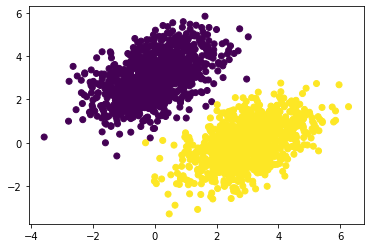

In [14]:
# Veamos la nube de puntos...
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels[:, 0])
plt.show()

A linear classifier is an affine transformation (prediction = W • input + b)  
trained to minimize the square of the difference between predictions and the target  
Todo consiste en encontrar los coeficientes de la matriz (transf. lineal) y el vector desplazamiento.

In [23]:
input_dim = 2  # La entrada de la red tiene dimensión 2 (coordenada x e y)
output_dim = 1 # La salida tiene una sola dimensión (un número que nos identifica la clase)
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
# W es [[w1] [w2]]
# b es un escalar

In [21]:
# Forward pass es simplemente la transformación que se lleva a cabo
# de la entrada a la salida, aplicando la transformación lineal
def model(inputs):
    return tf.matmul(inputs, W) + b
    # el return es w1 • x + w2 • y + b

In [22]:
# Función de pérdida...  para varios resultados, se calcula conjunta...
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [24]:
# Entrenamiento...
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [26]:
# We’ll do batch training instead of mini-batch training
# we’ll run each training step (gradient computation and weight update) for all the data!!
# O sea, we’ll compute the forward pass and the gradients for 2,000 samples at once!!
# Por ello, cada entrenamiento llevará más tiempo, pero cada actualización será más efectiva
# ya que tiene toda la información de todos los datos
# Además, necesitaremos menos pasos de entrenamiento (daremos 40) y podremos usar un learning rate
# un poco mayor (usaremos 0.1)

for step in range(40):
    loss = training_step(inputs, labels)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.2887
Loss at step 1: 0.1176
Loss at step 2: 0.0908
Loss at step 3: 0.0827
Loss at step 4: 0.0775
Loss at step 5: 0.0729
Loss at step 6: 0.0688
Loss at step 7: 0.0651
Loss at step 8: 0.0616
Loss at step 9: 0.0585
Loss at step 10: 0.0556
Loss at step 11: 0.0529
Loss at step 12: 0.0505
Loss at step 13: 0.0483
Loss at step 14: 0.0463
Loss at step 15: 0.0444
Loss at step 16: 0.0428
Loss at step 17: 0.0412
Loss at step 18: 0.0398
Loss at step 19: 0.0385
Loss at step 20: 0.0373
Loss at step 21: 0.0362
Loss at step 22: 0.0352
Loss at step 23: 0.0343
Loss at step 24: 0.0334
Loss at step 25: 0.0327
Loss at step 26: 0.0320
Loss at step 27: 0.0313
Loss at step 28: 0.0308
Loss at step 29: 0.0302
Loss at step 30: 0.0297
Loss at step 31: 0.0293
Loss at step 32: 0.0289
Loss at step 33: 0.0285
Loss at step 34: 0.0281
Loss at step 35: 0.0278
Loss at step 36: 0.0275
Loss at step 37: 0.0273
Loss at step 38: 0.0270
Loss at step 39: 0.0268


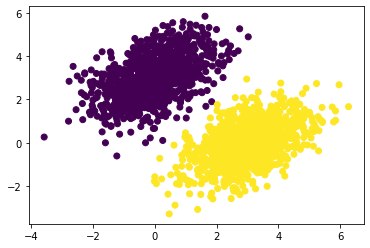

In [27]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

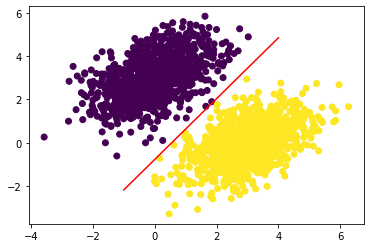

In [29]:
# Let’s plot this line
x = np.linspace(-1, 4, 100)
# La recta separadora es la que hace que W0 x + W1 y + b (o sea, el valor computado) sea 0.5....
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)